In [38]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [39]:
import yaml

with open('config.yaml', 'r') as f:
    cfg = yaml.safe_load(f)

In [40]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import category_encoders as ce

In [41]:
df = pd.read_csv(cfg['datasets']['music'])
df.head()

C:\Users\CONDA\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2,4,9,12,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,uri,rank,artist_names,artists_num,artist_individual,artist_id,artist_genre,artist_img,collab,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
0,0,spotify:track:2gpQi3hbcUAcEG8m2dlgfB,1,Paulo Londra,1,Paulo Londra,spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z,argentine hip hop,https://i.scdn.co/image/ab6761610000e5ebf796a9...,0,...,0.0495,0,0.0658,0.557,173.935,178203,Argentina,South America,Spanish,0
1,1,spotify:track:2x8oBuYaObjqHqgGuIUZ0b,2,WOS,1,WOS,spotify:artist:5YCc6xS5Gpj3EkaYGdjyNK,argentine indie,https://i.scdn.co/image/ab6761610000e5eb75e151...,0,...,0.724,0,0.134,0.262,81.956,183547,Argentina,South America,Spanish,0
2,2,spotify:track:2SJZdZ5DLtlRosJ2xHJJJa,3,Paulo Londra,1,Paulo Londra,spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z,argentine hip hop,https://i.scdn.co/image/ab6761610000e5ebf796a9...,0,...,0.241,0,0.0929,0.216,137.915,204003,Argentina,South America,Spanish,0
3,3,spotify:track:1O2pcBJGej0pmH2Y9XZMs6,5,Cris Mj,1,Cris Mj,spotify:artist:1Yj5Xey7kTwvZla8sqdsdE,urbano chileno,https://i.scdn.co/image/ab6761610000e5eb8f4ebc...,0,...,0.0924,4.6e-05,0.0534,0.832,96.018,153750,Argentina,South America,Spanish,0
4,4,spotify:track:1TpZKxGnHp37ohJRszTSiq,6,Emilia,1,Emilia,spotify:artist:0AqlFI0tz2DsEoJlKSIiT9,pop argentino,https://i.scdn.co/image/ab6761610000e5ebaf96d1...,0,...,0.0811,6.25e-05,0.101,0.501,95.066,133895,Argentina,South America,Spanish,0


In [42]:
df.drop(
    ['Unnamed: 0', 'uri','artist_names','artist_individual','artist_id', 'artist_img', 'track_name', 'release_date', 'album_cover', 'source', 'week', 'previous_rank', 'peak_rank', 'weeks_on_chart'],
    axis=1,
    inplace=True
)
df.head()

,rank,artists_num,artist_genre,collab,album_num_tracks,streams,danceability,energy,key,mode,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
0,1,1,argentine hip hop,0,1,3003411,0.583,0.834,0,1,...,0.0495,0,0.0658,0.557,173.935,178203,Argentina,South America,Spanish,0
1,2,1,argentine indie,0,1,2512175,0.654,0.354,5,1,...,0.724,0,0.134,0.262,81.956,183547,Argentina,South America,Spanish,0
2,3,1,argentine hip hop,0,2,2408983,0.721,0.463,1,0,...,0.241,0,0.0929,0.216,137.915,204003,Argentina,South America,Spanish,0
3,5,1,urbano chileno,0,1,2080139,0.87,0.548,10,0,...,0.0924,4.6e-05,0.0534,0.832,96.018,153750,Argentina,South America,Spanish,0
4,6,1,pop argentino,0,1,1923270,0.761,0.696,7,0,...,0.0811,6.25e-05,0.101,0.501,95.066,133895,Argentina,South America,Spanish,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787999 entries, 0 to 1787998
Data columns (total 22 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   rank              object
 1   artists_num       object
 2   artist_genre      object
 3   collab            object
 4   album_num_tracks  object
 5   streams           object
 6   danceability      object
 7   energy            object
 8   key               object
 9   mode              object
 10  loudness          object
 11  speechiness       object
 12  acousticness      object
 13  instrumentalness  object
 14  liveness          object
 15  valence           object
 16  tempo             object
 17  duration          object
 18  country           object
 19  region            object
 20  language          object
 21  pivot             object
dtypes: object(22)
memory usage: 300.1+ MB


In [44]:
df['collab'].unique()

array([0, 1, '1', 'collab', '0'], dtype=object)

In [45]:
rows_count = df.shape[0]
df.set_index('collab', inplace = True)
df = df.drop('collab')
df.reset_index(inplace= True)
print("rows deleted: ", rows_count -  df.shape[0])

rows deleted:  73


In [46]:
columns_to_numeric = list(df.columns)
columns_not_to_numeric = ['artist_genre', 'country', 'region', 'language']
for column in columns_not_to_numeric:
    if column in columns_to_numeric:
        columns_to_numeric.remove(column)
columns_to_numeric
df[columns_to_numeric] = df[columns_to_numeric].apply(pd.to_numeric, errors='coerce')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787926 entries, 0 to 1787925
Data columns (total 22 columns):
 #   Column            Dtype  
---  ------            -----  
 0   collab            int64  
 1   rank              int64  
 2   artists_num       float64
 3   artist_genre      object 
 4   album_num_tracks  float64
 5   streams           int64  
 6   danceability      float64
 7   energy            float64
 8   key               float64
 9   mode              float64
 10  loudness          float64
 11  speechiness       float64
 12  acousticness      float64
 13  instrumentalness  float64
 14  liveness          float64
 15  valence           float64
 16  tempo             float64
 17  duration          float64
 18  country           object 
 19  region            object 
 20  language          object 
 21  pivot             int64  
dtypes: float64(14), int64(4), object(4)
memory usage: 300.1+ MB


In [48]:
cat_df = df.select_dtypes(include=['object'])
num_df = df.select_dtypes(exclude=['object'])

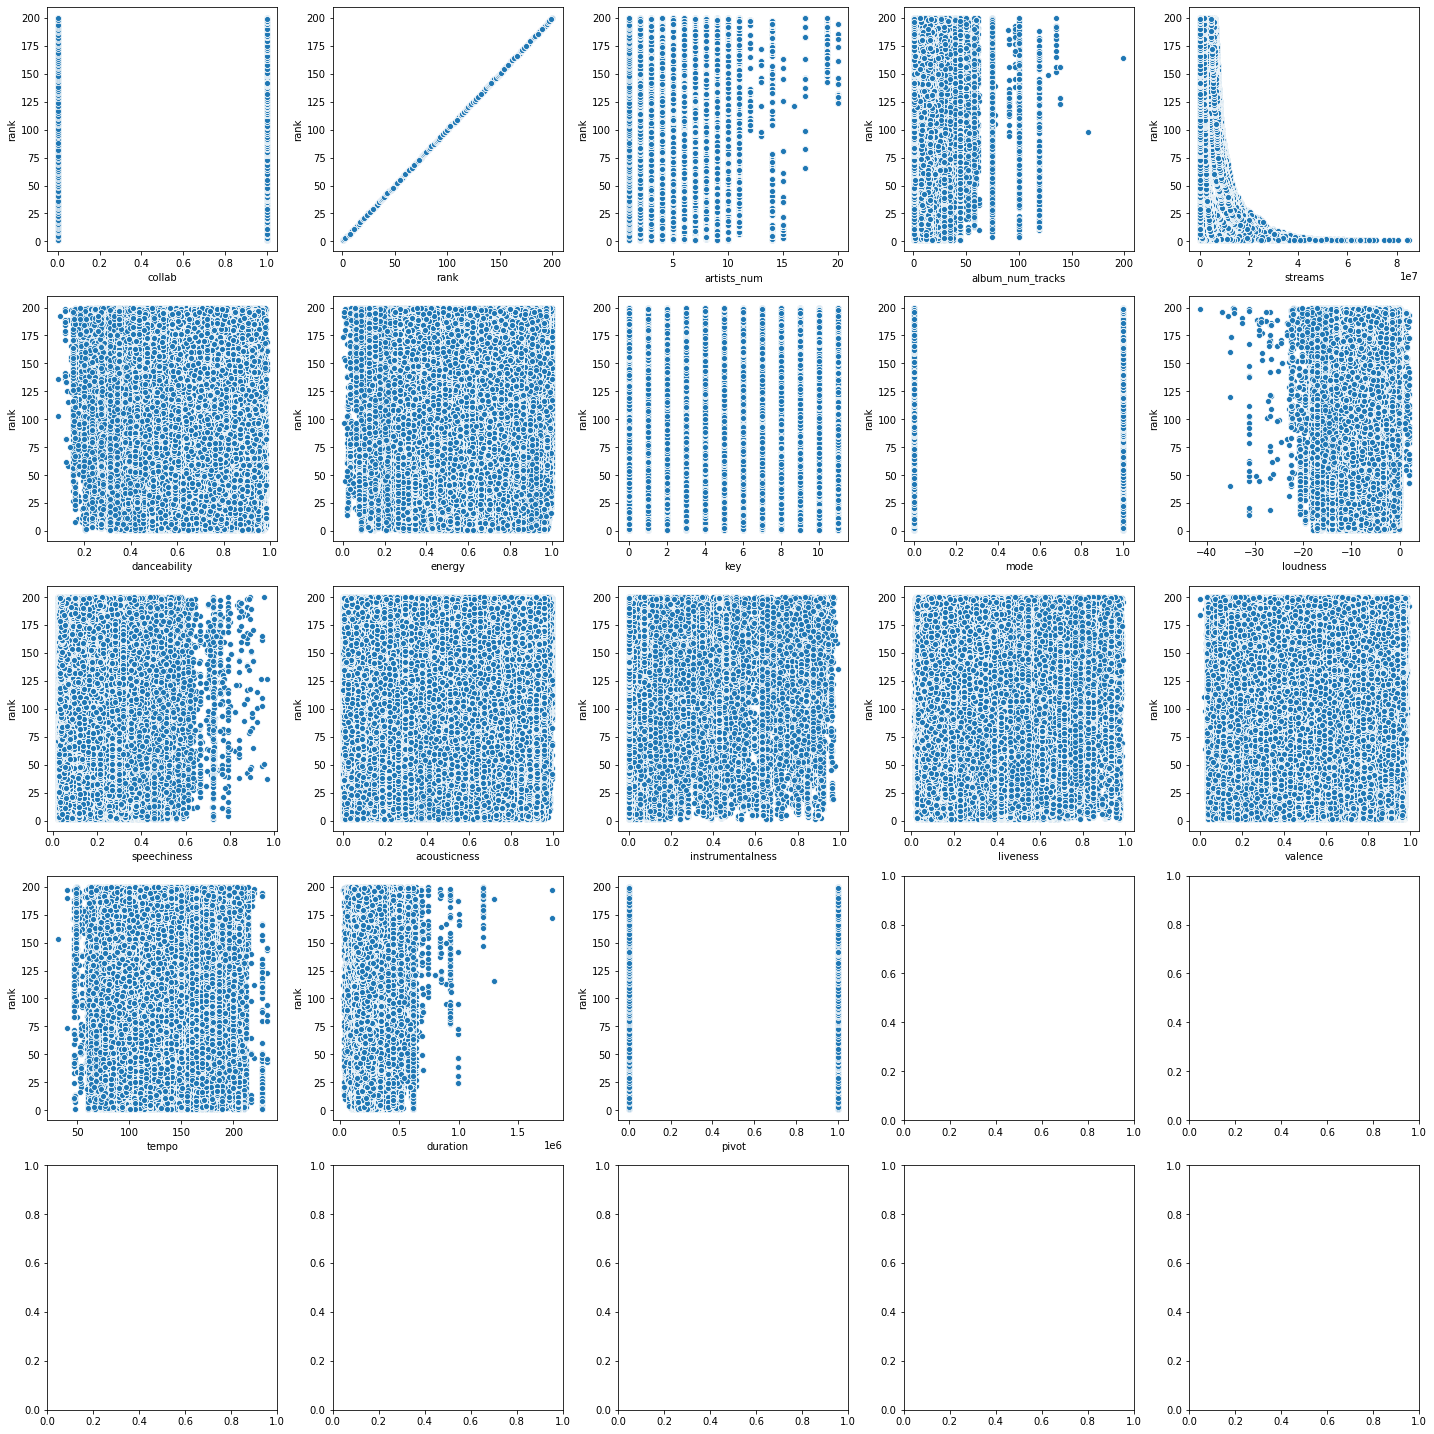

In [49]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
axes_flattened = axes.reshape(-1)
for i in range(len(num_df.columns)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=num_df.iloc[:, i],
        y='rank',
        data=num_df.dropna(),
        ax=ax,
    )
fig.tight_layout(pad=1.0)

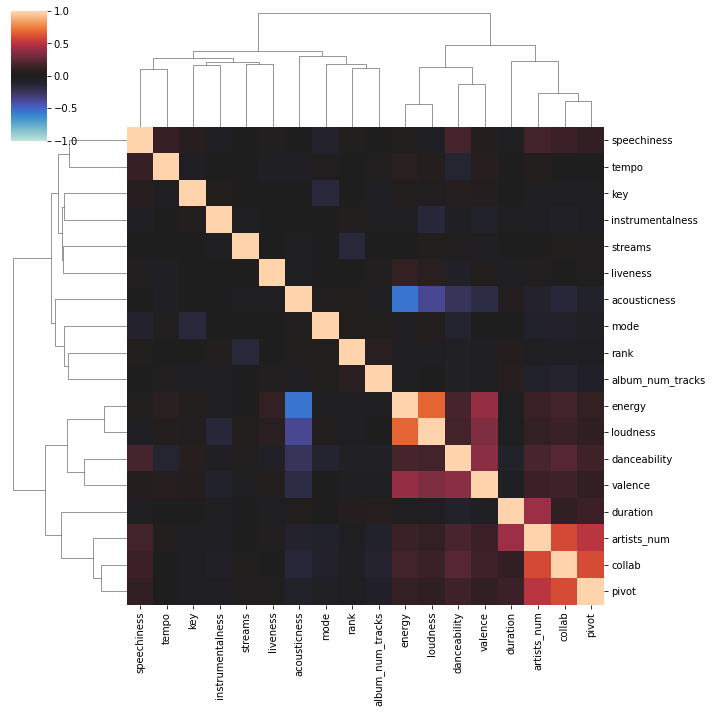

In [50]:
def corrplot(df, method="pearson", annot=True, **kwargs):
    sns.clustermap(
        df.corr(method),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )


corrplot(df, annot=None)

In [51]:
df.drop(
    ['energy'],
    axis=1,
    inplace=True
)

In [52]:
nan_df = (df.isnull().mean() * 100).reset_index()
nan_df.columns = ["column_name", "percentage"]
nan_df.sort_values("percentage", ascending=False, inplace=True)
nan_df.head(10)

,column_name,percentage
10,speechiness,0.022093
14,valence,0.022093
16,duration,0.022093
6,danceability,0.022093
7,key,0.022093
8,mode,0.022093
9,loudness,0.022093
15,tempo,0.022093
11,acousticness,0.022093
12,instrumentalness,0.022093


In [53]:
intro_srt = "Number of columns with more than"
print(f"{intro_srt} {0.02}% NANs: {(nan_df.percentage > 0.02).sum()}")

Number of columns with more than 0.02% NANs: 11


In [54]:
rows_count = df.shape[0]
df = df.dropna()
df = df.reset_index(drop=True)
print("rows deleted: ", rows_count -  df.shape[0])

rows deleted:  395


In [55]:
def get_almost_constant_columns(df, dropna=True):
    cols = []
    for i in df:
        if dropna:
            counts = df[i].dropna().value_counts()
        else:
            counts = df[i].value_counts()
        most_popular_value_count = counts.iloc[0]
        if (most_popular_value_count / len(df)) * 100 > 96:
            cols.append(i)
    return cols

In [56]:
overfit_num = get_almost_constant_columns(df, dropna=True)
overfit_num

[]

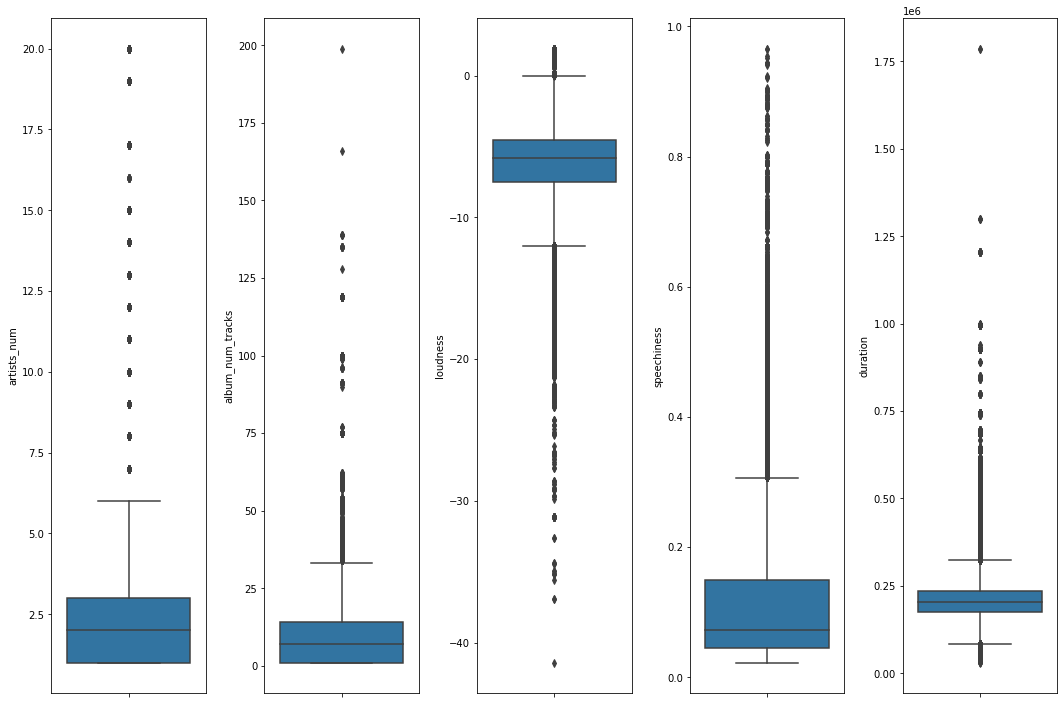

In [57]:
out_col = ['artists_num', 'album_num_tracks', 'loudness', 'speechiness', 'duration']

fig, axes = plt.subplots(1, 5, figsize=(15, 10))
for ax, col in zip(axes, out_col):
    sns.boxplot(y=df[col], data=df, ax=ax)
fig.tight_layout(pad=1.5)

In [58]:
rows_count = df.shape[0]
for col, upper_bound in (
    ('album_num_tracks', 150),
    ('duration', 1.1)
):
    df.drop(df[df[col] > upper_bound].index)    
df.drop(df[df['loudness'] < -40].index)
print("rows deleted: ", rows_count -  df.shape[0])

rows deleted:  0


In [59]:
cat_df = df.select_dtypes(include=['object'])
num_df = df.select_dtypes(exclude=['object'])

In [60]:
for column in cat_df:
    print(column, cat_df[column].nunique())

artist_genre 1874
country 74
region 10
language 40


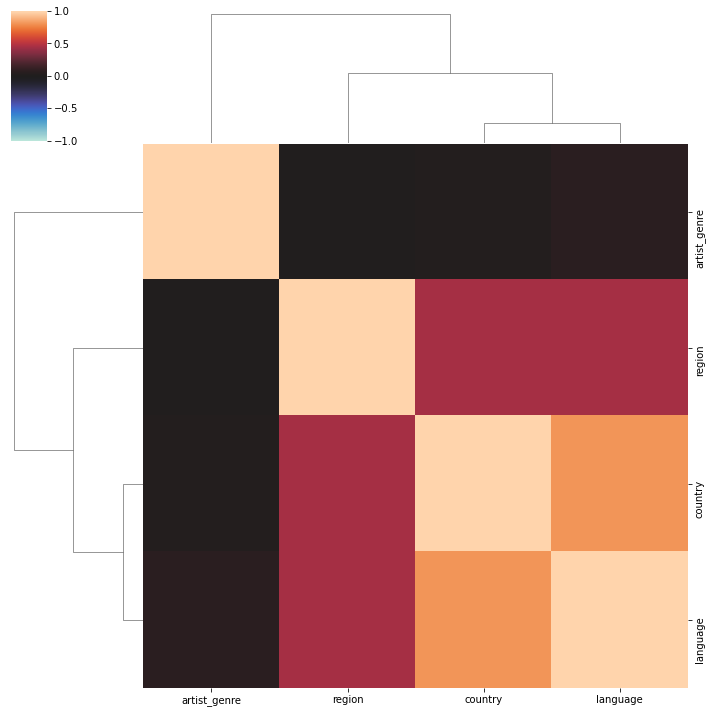

In [61]:
target_encoder = ce.TargetEncoder()
te_df = target_encoder.fit_transform(cat_df, df['rank'])
corrplot(te_df, annot=None)

In [62]:
te_df.drop(['language'], axis=1, inplace=True)
cat_df.drop(['language'], axis=1, inplace=True)

C:\Users\CONDA\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [63]:
df_with_te = pd.concat([num_df, te_df], axis=1, join='inner')
df_with_te.head()

,collab,rank,artists_num,album_num_tracks,streams,danceability,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,pivot,artist_genre,country,region
0,0,1,1.0,1.0,3003411,0.583,0.0,1.0,-4.875,0.0444,0.0495,0.000000,0.0658,0.557,173.935,178203.0,0,101.795297,95.89022,98.24155
1,0,2,1.0,1.0,2512175,0.654,5.0,1.0,-7.358,0.0738,0.7240,0.000000,0.1340,0.262,81.956,183547.0,0,125.986046,95.89022,98.24155
2,0,3,1.0,2.0,2408983,0.721,1.0,0.0,-9.483,0.0646,0.2410,0.000000,0.0929,0.216,137.915,204003.0,0,101.795297,95.89022,98.24155
3,0,5,1.0,1.0,2080139,0.870,10.0,0.0,-5.253,0.0770,0.0924,0.000046,0.0534,0.832,96.018,153750.0,0,83.306098,95.89022,98.24155
4,0,6,1.0,1.0,1923270,0.761,7.0,0.0,-3.817,0.0505,0.0811,0.000063,0.1010,0.501,95.066,133895.0,0,81.694801,95.89022,98.24155


In [64]:
ohe_df = pd.get_dummies(cat_df[['region', 'country']])

In [65]:
df_with_mixed_enc = pd.concat([num_df, ohe_df, te_df['artist_genre']], axis=1, join='inner')
df_with_mixed_enc.head()

,collab,rank,artists_num,album_num_tracks,streams,danceability,key,mode,loudness,speechiness,...,country_Thailand,country_Turkey,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Venezuela,country_Vietnam,artist_genre
0,0,1,1.0,1.0,3003411,0.583,0.0,1.0,-4.875,0.0444,...,0,0,0,0,0,0,0,0,0,101.795297
1,0,2,1.0,1.0,2512175,0.654,5.0,1.0,-7.358,0.0738,...,0,0,0,0,0,0,0,0,0,125.986046
2,0,3,1.0,2.0,2408983,0.721,1.0,0.0,-9.483,0.0646,...,0,0,0,0,0,0,0,0,0,101.795297
3,0,5,1.0,1.0,2080139,0.870,10.0,0.0,-5.253,0.0770,...,0,0,0,0,0,0,0,0,0,83.306098
4,0,6,1.0,1.0,1923270,0.761,7.0,0.0,-3.817,0.0505,...,0,0,0,0,0,0,0,0,0,81.694801


In [66]:
cbe_encoder = ce.cat_boost.CatBoostEncoder()
сbe_df = cbe_encoder.fit_transform(cat_df, df['rank'])
df_with_cbe = pd.concat([num_df, сbe_df], axis=1, join='inner')
df_with_cbe.head()

,collab,rank,artists_num,album_num_tracks,streams,danceability,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,pivot,artist_genre,country,region
0,0,1,1.0,1.0,3003411,0.583,0.0,1.0,-4.875,0.0444,0.0495,0.000000,0.0658,0.557,173.935,178203.0,0,99.07214,99.072140,99.072140
1,0,2,1.0,1.0,2512175,0.654,5.0,1.0,-7.358,0.0738,0.7240,0.000000,0.1340,0.262,81.956,183547.0,0,99.07214,50.036070,50.036070
2,0,3,1.0,2.0,2408983,0.721,1.0,0.0,-9.483,0.0646,0.2410,0.000000,0.0929,0.216,137.915,204003.0,0,50.03607,34.024047,34.024047
3,0,5,1.0,1.0,2080139,0.870,10.0,0.0,-5.253,0.0770,0.0924,0.000046,0.0534,0.832,96.018,153750.0,0,99.07214,26.268035,26.268035
4,0,6,1.0,1.0,1923270,0.761,7.0,0.0,-3.817,0.0505,0.0811,0.000063,0.1010,0.501,95.066,133895.0,0,99.07214,22.014428,22.014428


# df_with_cbe df_with_mixed_enc df_with_te

# Model training section

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [68]:
df.head()

,collab,rank,artists_num,artist_genre,album_num_tracks,streams,danceability,key,mode,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,duration,country,region,language,pivot
0,0,1,1.0,argentine hip hop,1.0,3003411,0.583,0.0,1.0,-4.875,...,0.0495,0.000000,0.0658,0.557,173.935,178203.0,Argentina,South America,Spanish,0
1,0,2,1.0,argentine indie,1.0,2512175,0.654,5.0,1.0,-7.358,...,0.7240,0.000000,0.1340,0.262,81.956,183547.0,Argentina,South America,Spanish,0
2,0,3,1.0,argentine hip hop,2.0,2408983,0.721,1.0,0.0,-9.483,...,0.2410,0.000000,0.0929,0.216,137.915,204003.0,Argentina,South America,Spanish,0
3,0,5,1.0,urbano chileno,1.0,2080139,0.870,10.0,0.0,-5.253,...,0.0924,0.000046,0.0534,0.832,96.018,153750.0,Argentina,South America,Spanish,0
4,0,6,1.0,pop argentino,1.0,1923270,0.761,7.0,0.0,-3.817,...,0.0811,0.000063,0.1010,0.501,95.066,133895.0,Argentina,South America,Spanish,0


Дерево решений

In [69]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [70]:
target = 'peak_rank'
features = list(df.columns)
features.remove(target)
features

ValueError: list.remove(x): x not in list

In [ ]:
X = df[features]
y = df[[target]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.reshape(-1), train_size=0.8, shuffle=True)
for leaf in range(200000, 250001, 10000):
    tree = DecisionTreeClassifier(max_depth=53, min_samples_leaf=1, max_leaf_nodes=leaf)
    tree.fit(X_train, y_train)
    print(f'leaf = {leaf}, acc = {tree.score(X_test, y_test)}')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.reshape(-1), train_size=0.8, shuffle=True)
tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=100)
tree.fit(X_train, y_train)

In [ ]:
tree.predict_proba(X_test)[:, 1]

In [ ]:
tree.score(X_test, y_test)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plot_tree(tree, ax=ax)

KNN

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
target = 'peak_rank'
features = list(df.columns)
features.remove(target)
features

In [ ]:
X = df[features]
y = df[[target]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.reshape(-1), train_size=0.8, shuffle=True)

In [ ]:
K_NEIGHBORS = 5
knn_wdbc_sklearn = KNeighborsClassifier(
    n_neighbors=K_NEIGHBORS, metric="euclidean", algorithm="brute", weights="uniform"
)
knn_wdbc_sklearn.fit(X=X, y=y.values.reshape(-1))
y_wdbc_pred_sklearn = knn_wdbc_sklearn.predict(X=X)
print("kNN sklearn: ", accuracy_score(y_true=y, y_pred=y_wdbc_pred_sklearn))